In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2

In [2]:
train_dataset = image_dataset_from_directory("../Data/train/",
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224),
                                             validation_split=0.2,
                                             subset='training',
                                             seed=1)
validation_dataset = image_dataset_from_directory("../Data/valid/",
                                             shuffle=True,
                                             batch_size=32,
                                             image_size=(224, 224),
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=1)

Found 613 files belonging to 4 classes.
Using 491 files for training.
Found 72 files belonging to 4 classes.
Using 14 files for validation.


In [3]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def scanModel():
    baseModel = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    baseModel.trainable = False
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = preprocess_input(inputs)
    x = baseModel(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)

model = scanModel()

In [4]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable

In [8]:
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20


16/16 [==============================] - 9s 445ms/step - loss: 0.3541 - accuracy: 0.8982 - val_loss: 0.6977 - val_accuracy: 0.6429
Epoch 2/20
16/16 [==============================] - 7s 414ms/step - loss: 0.3445 - accuracy: 0.8859 - val_loss: 0.7825 - val_accuracy: 0.6429
Epoch 3/20
16/16 [==============================] - 7s 421ms/step - loss: 0.3078 - accuracy: 0.8921 - val_loss: 0.7099 - val_accuracy: 0.6429
Epoch 4/20
16/16 [==============================] - 7s 423ms/step - loss: 0.3051 - accuracy: 0.9043 - val_loss: 0.6699 - val_accuracy: 0.7143
Epoch 5/20
16/16 [==============================] - 7s 425ms/step - loss: 0.2855 - accuracy: 0.9165 - val_loss: 0.6711 - val_accuracy: 0.7857
Epoch 6/20
16/16 [==============================] - 7s 427ms/step - loss: 0.2841 - accuracy: 0.9145 - val_loss: 0.7317 - val_accuracy: 0.5714
Epoch 7/20
16/16 [==============================] - 7s 429ms/step - loss: 0.2688 - accuracy: 0.9206 - val_loss: 0.6870 - val_accuracy: 0.6429
Epoch 8/20
16/16 

In [9]:
test_dataset = image_dataset_from_directory("../Data/test/",
                                                shuffle=True,
                                                batch_size=32,
                                                image_size=(224, 224),
                                                seed=1)
model.evaluate(test_dataset)

Found 315 files belonging to 4 classes.
10/10 [==============================] - 4s 400ms/step - loss: 0.6453 - accuracy: 0.7333


[0.645327627658844, 0.7333333492279053]

(32, 224, 224, 3)


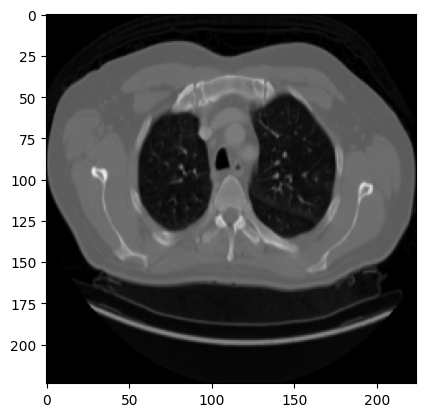

1/1 [==============================] - 3s 3s/step
0
0


In [22]:
img, label = test_dataset.as_numpy_iterator().next()
print(img.shape)
plt.imshow(img[0].astype('uint8'))
plt.show()

predictions = model.predict(img)
print(np.argmax(predictions[0]))

print(label[0])


In [23]:
model.save('model.h5')